In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# For 70-15-15 split

In [20]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import tensorflow as tf

# Function to load images from a given folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (32, 32))  # Resize to 32x32
            images.append(img)
            labels.append(label)
    return images, labels

# Function to load dataset from folders
def load_dataset(base_path):
    # Load images from each folder
    x_train, y_train = [], []
    x_test, y_test = [], []
    x_val, y_val = [], []

    for sub_folder in ['train_70_15_15', 'test_70_15_15', 'val_70_15_15']:
        folder_path = os.path.join(base_path, sub_folder)
        for label, class_name in enumerate(['Glaucoma', 'Healthy']):
            class_folder = os.path.join(folder_path, class_name)
            images, labels = load_images_from_folder(class_folder, label)
            if sub_folder == 'train_70_15_15':
                x_train.extend(images)
                y_train.extend(labels)
            elif sub_folder == 'test_70_15_15':
                x_test.extend(images)
                y_test.extend(labels)
            elif sub_folder == 'val_70_15_15':
                x_val.extend(images)
                y_val.extend(labels)

    x_train = np.array(x_train, dtype='float32') / 255.0
    x_test = np.array(x_test, dtype='float32') / 255.0
    x_val = np.array(x_val, dtype='float32') / 255.0
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    x_train = x_train.reshape(-1, 32, 32)
    x_test = x_test.reshape(-1, 32, 32)
    x_val = x_val.reshape(-1, 32, 32)

    return x_train, x_test, x_val, y_train, y_test, y_val

# Load datasets
base_path = '/content/drive/MyDrive/hariDataset/70_15_15/70_15_15'  # Replace with your dataset path

# Load dataset
x_train, x_test, x_val, y_train, y_test, y_val = load_dataset(base_path)



In [ ]:

# Define the RNN model
def create_rnn_model():
    model = Sequential([
        SimpleRNN(128, input_shape=(32, 32), activation='relu'),  # RNN layer
        Dense(64, activation='relu'),  # Fully connected layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate model
def train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test):
    model = create_rnn_model()
    model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))
    y_pred_proba = model.predict(x_test)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    return model, y_test, y_pred, y_pred_proba


# Train and evaluate the RNN model
model, y_test, y_pred, y_pred_proba = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)

# Save the model
model.save('/content/drive/MyDrive/hariDataset/70_15_15/70_15_15/best_glaucoma_rnn_model.h5')



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 0.6864 - loss: 0.6507 - val_accuracy: 0.7673 - val_loss: 0.5405
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7701 - loss: 0.5190 - val_accuracy: 0.7837 - val_loss: 0.4903
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7724 - loss: 0.4806 - val_accuracy: 0.7837 - val_loss: 0.4838
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7599 - loss: 0.5118 - val_accuracy: 0.7755 - val_loss: 0.4745
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7661 - loss: 0.4733 - val_accuracy: 0.7837 - val_loss: 0.4692
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7764 - loss: 0.4504 - val_accuracy: 0.8082 - val_loss: 0.4545
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7894 - loss: 0.4579 - val_accuracy: 0.8163 - val_loss: 0.4343
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8230 - loss: 0.4196 - val_accuracy: 0.8204 - val_

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Test Accuracy: 88.84%


Accuracy: 0.9044
Precision: 0.8939
Recall: 0.9697
F1 Score: 0.9302
F2 Score: 0.9535
Average Precision (AP): 0.9251
AUC-ROC: 0.9015
Cohen's Kappa: 0.7791
Diagnostic Odds Ratio: 112.8421
Confusion Matrix:
[[ 67  19]
 [  5 160]]


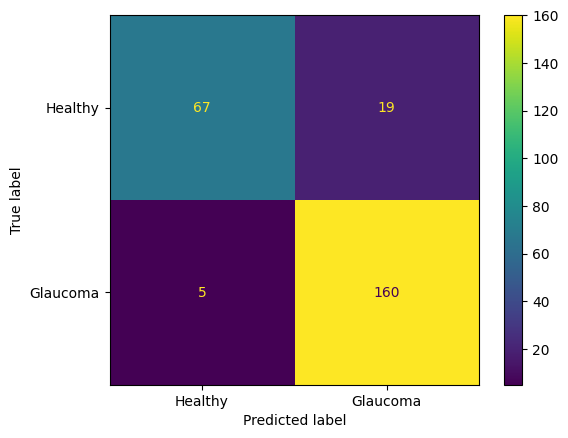

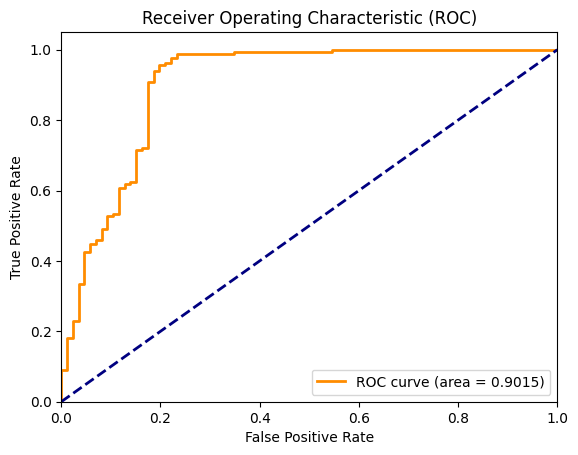

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    average_precision_score, roc_auc_score, confusion_matrix, roc_curve, auc,
    cohen_kappa_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
diagnostic_odds_ratio = (conf_matrix[0, 0] * conf_matrix[1, 1]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2_score:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Diagnostic Odds Ratio: {diagnostic_odds_ratio:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Healthy', 'Glaucoma']).plot()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/drive/MyDrive/DatasetU/best_glaucoma_rnn_model.h5')

# Function to classify a new image
def classify_image_rnn(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, 32, 32)
    prediction = model.predict(img)
    return 'Glaucoma' if prediction[0] >= 0.5 else 'Healthy'

# For 80-10-10 split

In [22]:
def load_dataset(base_path):
    # Load images from each folder
    x_train, y_train = [], []
    x_test, y_test = [], []
    x_val, y_val = [], []

    for sub_folder in ['train_80_10_10', 'test_80_10_10', 'val_80_10_10']:
        folder_path = os.path.join(base_path, sub_folder)
        for label, class_name in enumerate(['Glaucoma', 'Healthy']):
            class_folder = os.path.join(folder_path, class_name)
            images, labels = load_images_from_folder(class_folder, label)
            if sub_folder == 'train_80_10_10':
                x_train.extend(images)
                y_train.extend(labels)
            elif sub_folder == 'test_80_10_10':
                x_test.extend(images)
                y_test.extend(labels)
            elif sub_folder == 'val_80_10_10':
                x_val.extend(images)
                y_val.extend(labels)

    x_train = np.array(x_train, dtype='float32') / 255.0
    x_test = np.array(x_test, dtype='float32') / 255.0
    x_val = np.array(x_val, dtype='float32') / 255.0
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    x_train = x_train.reshape(-1, 32, 32)
    x_test = x_test.reshape(-1, 32, 32)
    x_val = x_val.reshape(-1, 32, 32)

    return x_train, x_test, x_val, y_train, y_test, y_val

# Load datasets
base_path = '/content/drive/MyDrive/hariDataset/80_10_10/80_10_10'  # Replace with your dataset path

# Load dataset
x_train, x_test, x_val, y_train, y_test, y_val = load_dataset(base_path)

In [23]:
model, y_test, y_pred, y_pred_proba = train_and_evaluate_model(x_train, y_train, x_val, y_val, x_test, y_test)
    
# Save the model
model.save('/content/drive/MyDrive/hariDataset/80_10_10/80_10_10/best_glaucoma_rnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7312 - loss: 0.6130 - val_accuracy: 0.7927 - val_loss: 0.4978
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7773 - loss: 0.5044 - val_accuracy: 0.7927 - val_loss: 0.4699
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7621 - loss: 0.4929 - val_accuracy: 0.7866 - val_loss: 0.4797
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7774 - loss: 0.4752 - val_accuracy: 0.7988 - val_loss: 0.4552
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7731 - loss: 0.4706 - val_accuracy: 0.7927 - val_loss: 0.4382
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7791 - loss: 0.4656 - val_accuracy: 0.8293 - val_loss: 0.4180
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8165 - loss: 0.4442 - val_accuracy: 0.8659 - val_loss: 0.4057
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7995 - loss: 0.4580 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Test Accuracy: 88.84%


Accuracy: 0.8902
Precision: 0.9035
Recall: 0.9364
F1 Score: 0.9196
F2 Score: 0.9296
Average Precision (AP): 0.8920
AUC-ROC: 0.8830
Cohen's Kappa: 0.7467
Diagnostic Odds Ratio: 57.5195
Confusion Matrix:
[[ 43  11]
 [  7 103]]


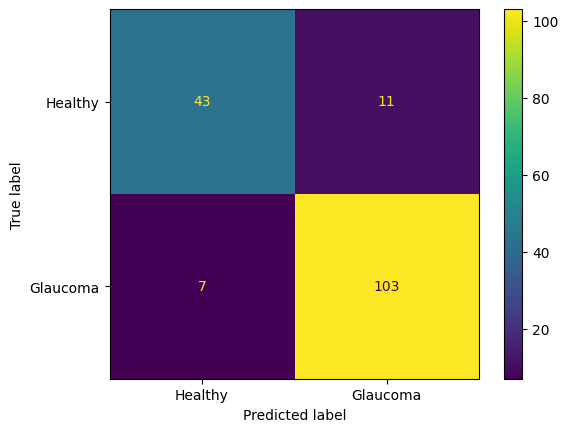

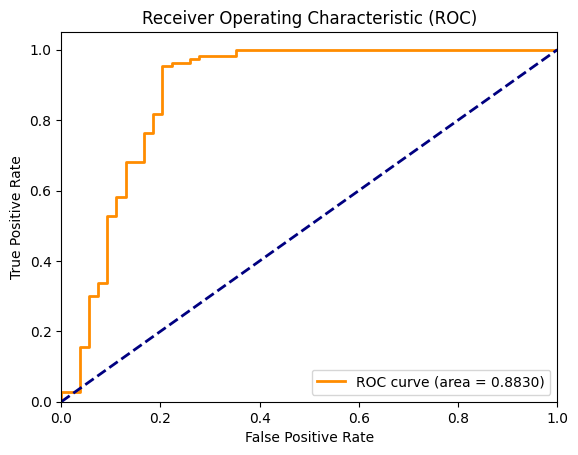

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Glaucoma


In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
diagnostic_odds_ratio = (conf_matrix[0, 0] * conf_matrix[1, 1]) / (conf_matrix[0, 1] * conf_matrix[1, 0])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2_score:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"Diagnostic Odds Ratio: {diagnostic_odds_ratio:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Healthy', 'Glaucoma']).plot()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Save the model
model.save('/content/drive/MyDrive/DatasetU/best_glaucoma_rnn_model.h5')

# Function to classify a new image
def classify_image_rnn(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, 32, 32)
    prediction = model.predict(img)
    return 'Glaucoma' if prediction[0] >= 0.5 else 'Healthy'

print(classify_image_rnn('/content/drive/MyDrive/hariDataset/80_10_10/80_10_10/test_80_10_10/Healthy/19.png', model))